# Geo Analysis 🌎

> Helpful code for working with geo data 

In [1]:
#| default_exp geoanalysis

In [2]:
#| hide
from nbdev.showdoc import *

## Triangulation 📐
>to caclculate area of polygon by building triangles

In [34]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

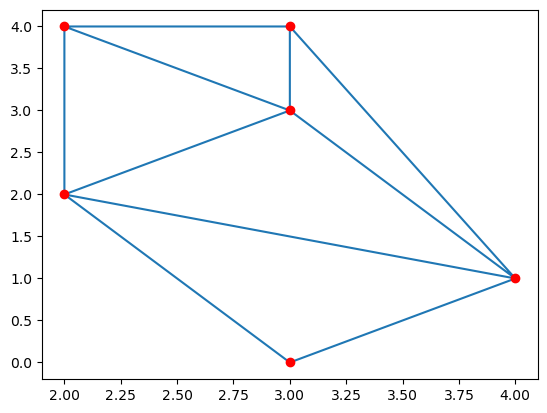

In [41]:
points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [3, 3]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

In [23]:
simplices #indices of points for all triangles

array([[2, 1, 0]], dtype=int32)

In [42]:
# Calculate Area
area=0
for triangle in simplices:
    a = distance.euclidean(points[triangle[0]], points[triangle[1]])
    b = distance.euclidean(points[triangle[1]], points[triangle[2]])
    c = distance.euclidean(points[triangle[0]], points[triangle[2]])
    area += (a+b+c) / 2
area

13.206842679766403

## Distance between two geographical points 🌎🚶🏻‍♂️🌏
- Euclidian Distance for flat surface
- **Haversine Distance** for earth  

>🧐 As the Earth is nearly spherical, the haversine formula provides a good approximation of the distance between two points of the Earth surface, with a less than 1% error on average.


In [67]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [68]:
# LON,LAT
A = [121.469170, 31.224361] #Shanghai
B = [52.520008, 13.404954] #Berlin
A_in_radians = [radians(_) for _ in A]
B_in_radians = [radians(_) for _ in B]
result = haversine_distances([A_in_radians, B_in_radians])
result = result * 6371  # multiply by Earth radius to get kilometers
print(f"Distance: {result[0,1]} km")


Distance: 7562.431880698887 km


In [71]:
# alternative code from https://stackoverflow.com/a/4913653
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

haversine(121.469170, 31.224361, 52.520008, 13.404954)

7253.253378350789

In [78]:
from geopy import distance
A = (31.224361, 121.469170) #Shanghai
B = (13.404954, 52.520008)
#Using GeoPy geodesic distance
print(distance.distance(A,B).km) # If one wants in miles, change `km` to `miles`
#Using GeoPy great-circle distance
print(distance.great_circle(A,B).km)

7261.828498025556
7253.263624666973



📚 [sklearn.metrics.pairwise.haversine_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html)


## Weather Data 🌦

My API is for "One Call by Call" subscription. It includes:   
- **1,000 API calls per day for free**
- Minute forecast for 1 hour
- Hourly forecast for 48 hours
- Daily forecast for 8 days
- Historical data for 40+ years back by timestamp
- National weather alerts
- 📚 https://openweathermap.org/faq#onecall

*I needed to give my payment information - but set in settings not to allow more than ... calls.*

#### Historical Weather Data
`https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={time}&appid={API key}` 

In [63]:
# LOCATION
lon, lat = (121.469170, 31.224361) # Shanghai

# DATE
from datetime import datetime
dt = datetime.now() #datetime now
dt_str = "23.02.2022 09:12:00" # date in string format
dt = datetime.strptime(dt_str, '%d.%m.%Y %H:%M:%S')
ts = int(datetime.timestamp(dt)) #dt -> ts

# API-CALL
import sys
sys.path.append('/Users/dirkkalmbach/.mycredentials')
import config
api_key = config.api_openweather #https://openweathermap.org/appid#example
url = f"http://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={ts}&appid={api_key}"
response = requests.get(url) 

In [64]:
response.json()

{'lat': 31.2244,
 'lon': 121.4692,
 'timezone': 'Asia/Shanghai',
 'timezone_offset': 28800,
 'data': [{'dt': 1645578720,
   'sunrise': 1645568894,
   'sunset': 1645609633,
   'temp': 276.98,
   'feels_like': 276.98,
   'pressure': 1036,
   'humidity': 39,
   'dew_point': 265.28,
   'clouds': 85,
   'wind_speed': 0.45,
   'wind_deg': 17,
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04d'}]}]}